In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
path = "D:/Program/dataset/KDD2018/KDD_dataset/"

In [3]:
bj_meo = pd.read_csv(path+"beijing_17_18_meo.csv")
print(bj_meo.shape)
bj_meo.head()

(158047, 10)


,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [4]:
bj_meo.describe()

# The number of counts is inconsistent.
# It means the dataframe has some null

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,157813.000000,157813.000000
mean,116.395672,40.047275,38.182775,1026.798200,354.312894,35487.471178,96.933881
std,0.395223,0.264798,5030.694816,5025.748455,17423.723518,184454.823456,9748.857634
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,78.000000,0.900000
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,190.000000,1.500000
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,280.000000,2.500000
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


In [5]:
bj_meo.isnull().any()
# See how many data values are missing

station_id        False
longitude         False
latitude          False
utc_time          False
temperature       False
pressure          False
humidity          False
wind_direction     True
wind_speed         True
weather           False
dtype: bool

In [6]:
bj_meo[bj_meo.isnull().values==True].head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
8155,shunyi_meo,116.615278,40.126667,2018-01-05 11:00:00,-3.9,1023.0,35,NaN,NaN,Sunny/clear
8155,shunyi_meo,116.615278,40.126667,2018-01-05 11:00:00,-3.9,1023.0,35,NaN,NaN,Sunny/clear
8156,shunyi_meo,116.615278,40.126667,2018-01-05 12:00:00,-5.2,1023.6,47,NaN,NaN,Sunny/clear
8156,shunyi_meo,116.615278,40.126667,2018-01-05 12:00:00,-5.2,1023.6,47,NaN,NaN,Sunny/clear
8157,shunyi_meo,116.615278,40.126667,2018-01-05 13:00:00,-4.1,1023.9,35,NaN,NaN,Sunny/clear


In [7]:
# Check if the dataframe has duplicated row
# bj_meo.drop_duplicates()

In [8]:
bj_meo.dtypes

station_id         object
longitude         float64
latitude          float64
utc_time           object
temperature       float64
pressure          float64
humidity            int64
wind_direction    float64
wind_speed        float64
weather            object
dtype: object

In [9]:
# Fill NaN for wind_direction and wind_speed
new_bj_meo = bj_meo.fillna(999999)

# df.fillna(method='ffill')   
# ffill: propagate last valid observation forward to next valid backfill
new_bj_meo.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [10]:
dirty_data = new_bj_meo.loc[new_bj_meo['wind_direction']==999017, 'wind_speed']
dirty_data.value_counts()

0.0    2205
0.2    1863
0.1    1496
Name: wind_speed, dtype: int64

In [11]:
import random
# The range of wind_direction is 0--360, 
# which is not within this range and is replaced with the generated random number (0--360).

def clean_wind_direction(x):
    if x > 360:
        return random.randint(0, 360)
    return x

def clean_wind_speed(x):
    if x > 16:
        return random.randint(0, 16)
    return x

def clean_temperature(x):
    if x > 40 or x < -20:
        return random.randint(-20, 40)
    return x

def clean_pressure(x):
    if x > 1040 or x < 990:
        return random.randint(990, 1040)
    return x

def clean_humidity(x):
    if x > 100 or x < 0:
        return random.randint(0, 100)
    return x

In [12]:
new_bj_meo['wind_direction'] = new_bj_meo.wind_direction.apply(clean_wind_direction)
new_bj_meo.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000
mean,116.395672,40.047275,38.182775,1026.798200,354.312894,176.528729,1577.361118
std,0.395223,0.264798,5030.694816,5025.748455,17423.723518,106.311483,39661.057103
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,75.000000,0.900000
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,184.000000,1.500000
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,267.000000,2.500000
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,360.000000,999999.000000


In [13]:
dirty_data = new_bj_meo.loc[new_bj_meo['wind_speed']>15, 'wind_speed']
dirty_data.value_counts()

999999.0    249
15.4          1
Name: wind_speed, dtype: int64

In [14]:
# The wind_speed range is 0-16, not in this range with the generated random number (0-16)
new_bj_meo['wind_speed'] = new_bj_meo.wind_speed.apply(clean_wind_speed)

new_bj_meo['temperature'] = new_bj_meo.temperature.apply(clean_temperature)
new_bj_meo['pressure'] = new_bj_meo.pressure.apply(clean_pressure)
new_bj_meo['humidity'] = new_bj_meo.humidity.apply(clean_humidity)
new_bj_meo.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000
mean,116.395672,40.047275,12.874219,1011.682901,50.620910,176.528729,1.894877
std,0.395223,0.264798,12.079280,11.602921,26.053559,106.311483,1.395236
min,115.692222,39.718611,-20.000000,990.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,1002.100000,27.000000,75.000000,0.900000
50%,116.290556,39.973889,13.800000,1011.300000,48.000000,184.000000,1.500000
75%,116.626944,40.223333,23.200000,1020.400000,73.000000,267.000000,2.500000
max,117.117778,40.658889,40.000000,1040.000000,100.000000,360.000000,16.000000


In [15]:
new_bj_meo.to_csv(path+"process_data/bj_17_18_meo_clean.csv", index=False)

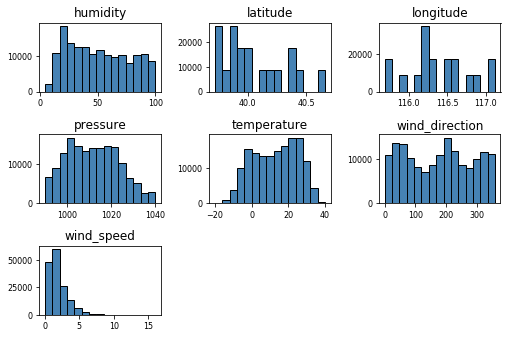

In [16]:
new_bj_meo.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)  
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [17]:
# chaoyangData = pd.DataFrame(meoData[meoData.station_id=='chaoyang_meo'])